In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 9

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
car=pd.read_csv('/Users/vika/Desktop/car_ad.csv', sep=',', encoding='latin-1')
car['price'] = car.price.astype('int64')
car=car.rename(columns={'car':'brands'})
car.head()

,brands,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brands        9576 non-null   object 
 1   price         9576 non-null   int64  
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 748.2+ KB


In [4]:
car = car.dropna()
print(car.shape)

(8739, 10)


In [5]:
car_expensive=car.groupby('brands').mean().sort_values('price', ascending=False).head(15)
car_expensive=car_expensive.reset_index(level=0, drop=False)
car_expensive

,brands,price,mileage,engV,year
0,Bentley,197504.625000,76.875000,6.046875,2011.312500
1,Ferrari,167500.000000,9.500000,4.400000,2011.500000
2,Lamborghini,130000.000000,20.000000,5.000000,2008.000000
3,Maserati,110000.000000,11.000000,4.700000,2014.000000
4,Aston Martin,105000.000000,22.333333,6.000000,2009.666667
5,Cadillac,70833.333333,55.666667,5.666667,2010.000000
6,Tesla,70666.666667,28.000000,0.600000,2013.666667
7,Rolls-Royce,65000.000000,32.500000,6.750000,2007.000000
8,Land Rover,50401.541096,92.328767,3.812260,2010.945205
9,Porsche,45537.626374,73.989011,3.894396,2010.527473


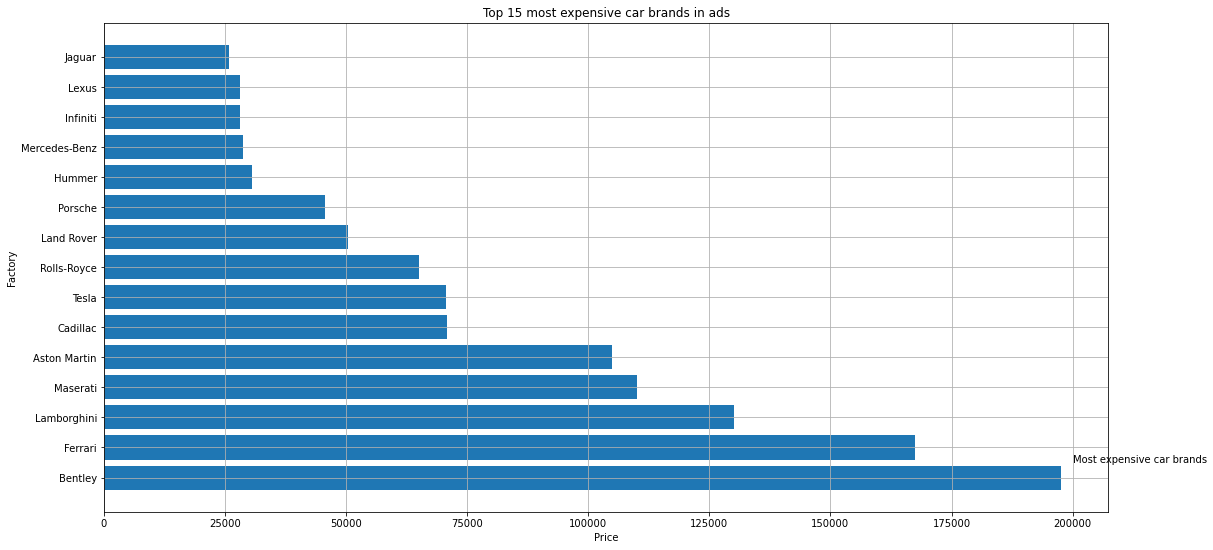

In [17]:
plt.barh(car_expensive['brands'], car_expensive['price'])
plt.xlabel('Price')
plt.ylabel('Factory')
plt.title('Top 15 most expensive car brands in ads')
plt.text(200000, 0.5, 'Most expensive car brands')
plt.grid()

In [ ]:
# Вывод: в топ-5 наиболее дорогих автомобильных брендов входят: Бентли, Феррари, Ламборгини, Мазерати и Астон Мартин

In [7]:
def age_function(row):
    age_car=2019-row['year']
    return age_car

In [8]:
car['age']=car.apply(age_function, axis=1)

In [9]:
car_engType=car.groupby(['brands', 'engType']).agg(['mean'])['engV']
car_engType.reset_index(level=1).head()

,engType,mean
brands,,
Acura,Gas,3.320000
Acura,Other,3.700000
Acura,Petrol,3.385714
Alfa Romeo,Diesel,1.900000
Alfa Romeo,Gas,1.700000


In [10]:
car_engType=car_engType.pivot_table(index = 'brands', columns = 'engType', values = 'mean', fill_value = 0)

<AxesSubplot:xlabel='brands'>

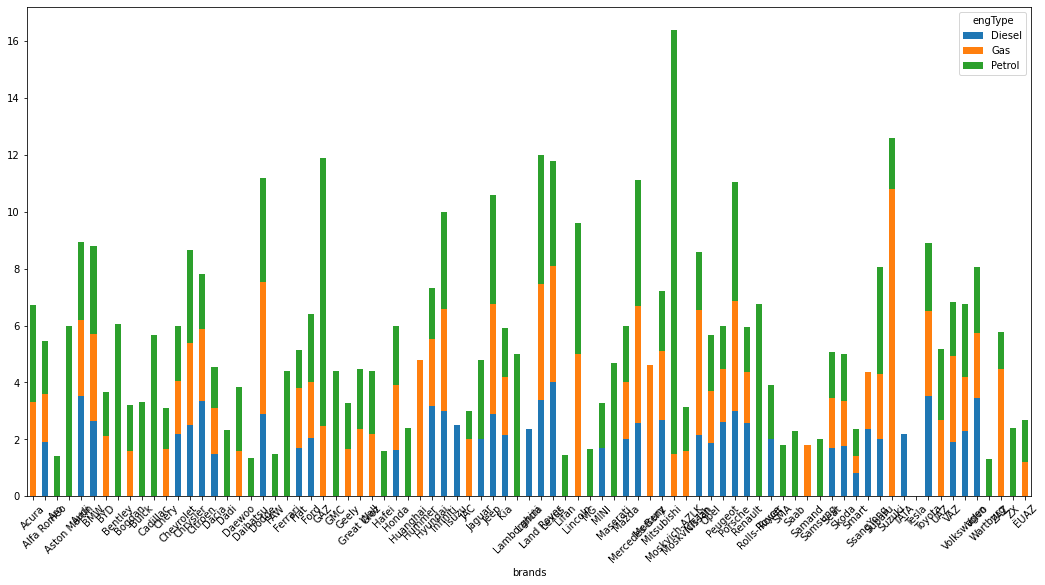

In [11]:
#Вывод: использование газа эффективнее на ДВС большего объема
car_engType[list(filter(lambda x: x != 'Other', car_engType.columns))]\
    .plot(kind='bar', rot=45, stacked=True)

In [ ]:
# Сравним автомобили трех немецких брендов BMW Audi Mercedes-Benz: цена, возраст, пробег

In [12]:
import seaborn as sns

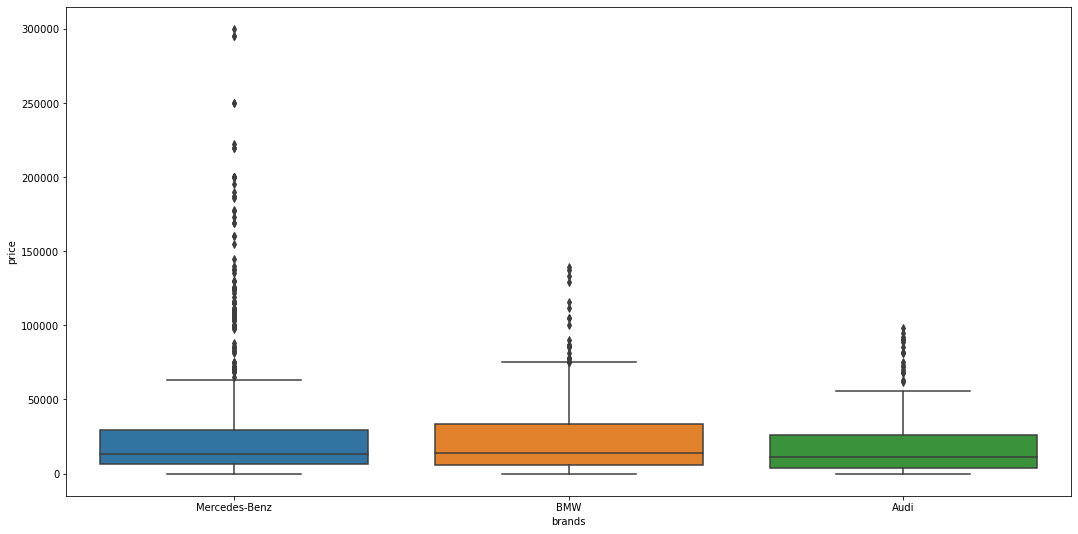

In [20]:
german_cars=['BMW', 'Audi', 'Mercedes-Benz']
ax = sns.boxplot(x='brands', y='price', 
            data=car[car.brands.isin(german_cars)])

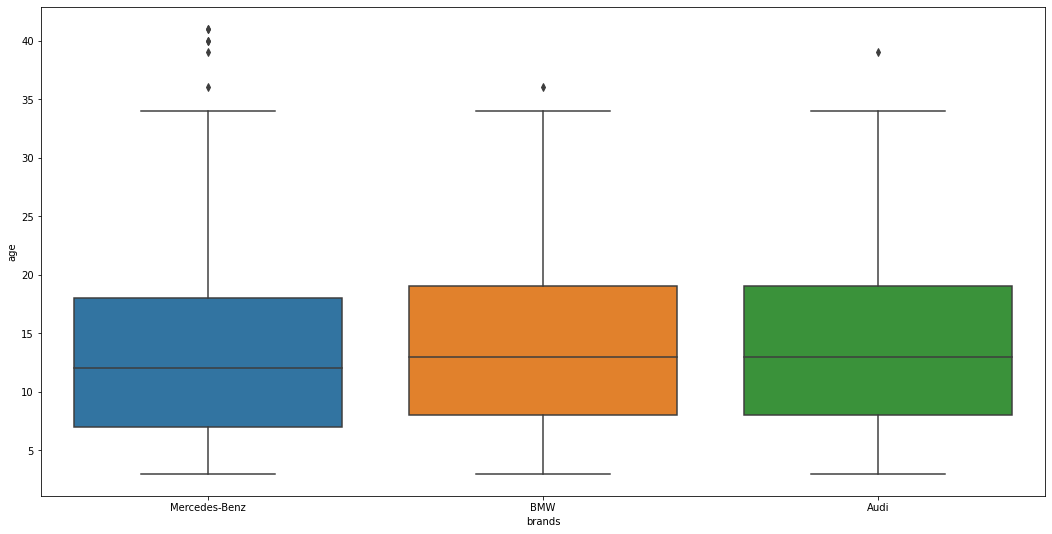

In [14]:
german_cars=['BMW', 'Audi', 'Mercedes-Benz']
ax = sns.boxplot(x='brands', y='age', 
            data=car[car.brands.isin(german_cars)])

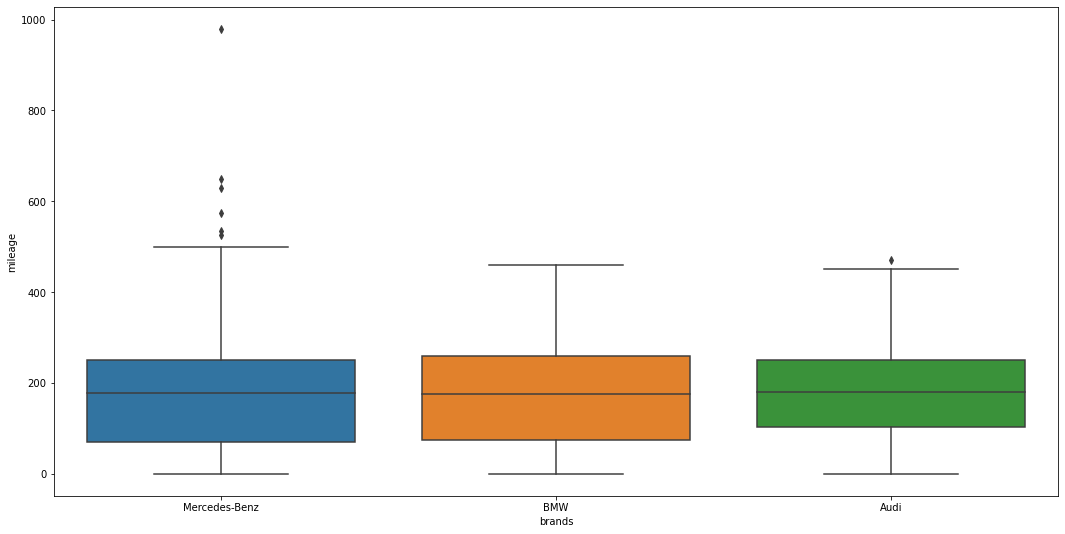

In [15]:
german_cars=['BMW', 'Audi', 'Mercedes-Benz']
ax = sns.boxplot(x='brands', y='mileage', 
            data=car[car.brands.isin(german_cars)])

In [ ]:
# БМВ имееют более высокую стоимость и при этом возраст их чуть выше конкурентов, у Мерседес стоимость чаще выходит из интерквартильного размаха. Отличие цены этих трех брендов даже на вторичном рынке незначительное, что подверждает их конкуренцию между собой.